In [5]:
import pandas as pd
import ast
import matplotlib.pyplot as plt


results = pd.read_csv("results.csv")

print(results)

   Unnamed: 0                                           best_ind  \
0           1  if_op(protected_div(if_op(sub(protected_div(ad...   
1          10  add(cos(add(mult(cos(mult(tan(5), x)), mult(if...   
2         100  if_op(x, cos(squared(7)), if_op(squared(square...   

                 fitness  tree_size  tree_depth  \
0  (0.8486089714356737,)         55          10   
1  (3.8869687590766033,)        455          35   
2   (0.736925569909732,)        200          21   

                                    fitness_over_gen  
0  [5.7780526066702835, 5.642170719915097, 5.4715...  
1  [6.288884679325218, 6.280380545790269, 6.28038...  
2  [6.2955553005630644, 5.6833703278158545, 5.683...  


In [6]:
def graph_convergens(items):
    # Create a copy to avoid modifying the original dataframe
    items_to_plot = items.copy()
    
    # Parse the fitness_over_gen column safely
    def parse_fitness(x):
        try:
            if isinstance(x, str):
                return [float(v) for v in ast.literal_eval(x)]
            elif isinstance(x, list):
                return [float(v) for v in x]
            else:
                return []
        except:
            print(f"Warning: Could not parse fitness data: {x}")
            return []
    
    items_to_plot['fitness_over_gen'] = items_to_plot['fitness_over_gen'].apply(parse_fitness)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    for idx, row in items_to_plot.iterrows():
        fitness_data = row['fitness_over_gen']
        if fitness_data:  # Only plot if data exists
            generations = range(len(fitness_data))
            # Use seed column if it exists, otherwise use index
            if 'seed' in row:
                label = f"Seed {row['seed']}"
            elif 'Unnamed: 0' in row:
                label = f"Seed {row['Unnamed: 0']}"
            else:
                label = f"Run {idx}"
            
            plt.plot(generations, fitness_data, label=label, linewidth=2)
    
    plt.xlabel("Generation")
    plt.ylabel("Mean of 3 Best Fitness (MSE)")
    plt.title("Convergence Curves for Symbolic Regression")
    plt.legend(title="Seeds")
    plt.grid(True, alpha=0.3)
    plt.show()


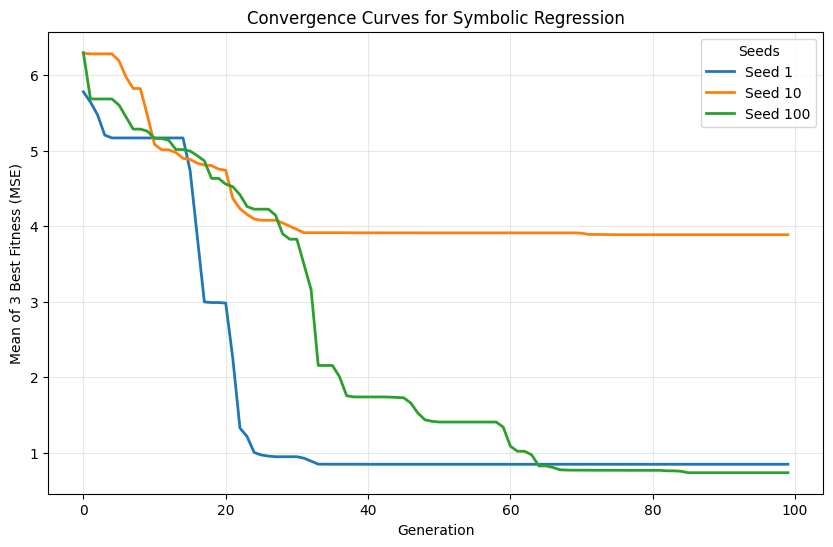

In [7]:
graph_convergens(results)